# Scikit Learn

In [4]:
import sklearn
print(sklearn.__version__)

1.4.2


### 주요 모듈
* 데이터셋은 Numpy의 ndarray, Pandas의 DataFrame, Scipy의 SparseMatrix 를 이용해 나타낼 수 있다.
* 모델을 다룰 때는 CoreAPI라고 불리는 fit, transformer, predict 와 같은 함수를 이용한다.
* [API Reference](https://scikit-learn.org/stable/api/index.html)
---
주로 사용하는 API
|범주|모듈명|설명|
|---|---|---|
|데이터셋|skelarn.datasets|사이킷런에서 제공하는 데이터셋|
|데이터타입|sklearn.utils.Bunch|사이킷런에서 제공하는 데이터셋의 데이터타입|
|데이터 전처리|sklearn.preprocessing|데이터 전처리(정규화, 인코딩, 스케일링 등)|
|데이터 분리|sklearn.model_selection.tran_test_split|학습/평가 데이터셋 분리|
|평가|sklearn.metrics|분류, 회귀, 클러스터링 알고리즘의 성능을 측정하는 함수 제공|
|ML 알고리즘|sklearn.ensemble|앙상블관련 머신러닝 알고리즘 - 랜덤포레스트, 에이다 부스트, 그래디언트 부스팅 등|
|ML 알고리즘|sklearn.linear_model|선형 머신러닝 알고리즘 - 릿지, 라쏘, SGD 등|
|ML 알고리즘|sklearn.naive_bayes|나이브 베이즈 관련 머신러닝 알고리즘|
|ML 알고리즘|sklearn.neighbors|KNN 관련 모델 - 릿지, 라쏘, SGD 등|
|ML 알고리즘|sklearn.svm|SVM관련 머신러닝 알고리즘|
|ML 알고리즘|sklearn.tree|트리 관련 머신러닝 알고리즘 - 의사결정 트리 등|
|ML 알고리즘|sklearn.cluster|군집 관련 머신러닝 알고리즘|

### 회귀 모델

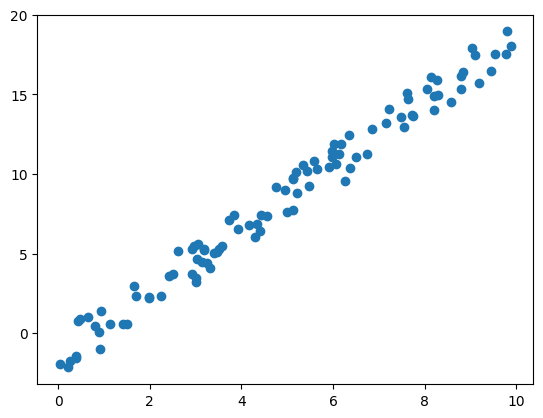

In [5]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x, y)

In [8]:
x.shape, y.shape

((100,), (100,))

In [9]:
# LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [10]:
model.fit(x, y) # ValueError: Expected 2D array, got 1D array instead

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
# 행렬 형태로 x의 shape 변경
X = x.reshape(-1, 1)
model.fit(X, y)

LinearRegression()

In [18]:
# 예측 수행 
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100, 1)
y_new = model.predict(X_new)

In [19]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y, y_new)

9.299028215052262

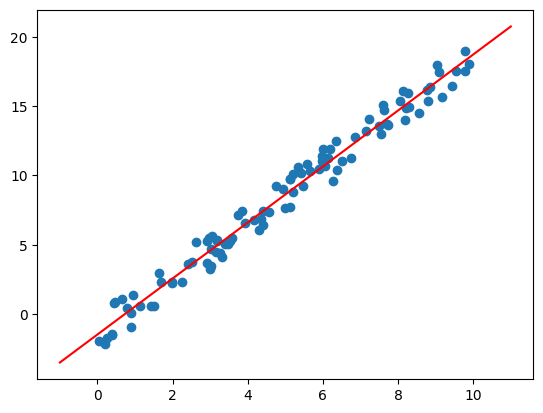

In [20]:
# 시각화
plt.scatter(X, y, label="input data")
plt.plot(X_new, y_new, color="red", label="regression line")

### datasets 모듈
* 사이킷런은 데이터셋을 모듈로 제공하고 있다.
* [공식문서](https://scikit-learn.org/stable/datasets)
---
* sklearn.datasets 모듈은 크게 dataset loaders와 dataset fetchers 로 나뉜다.
* 각각 Toy dataset과 Real World dataset을 제공하고 있다.
* Toy dataset 예시
  - datasets.boston(): 회귀 문제, 미국 보스턴 집값 예측(1.2 이후 삭제)
  - datasets.load_breast_cancer(): 분류 문제, 유방암 판별
  - datasets.load_iris(): 분류 문제, iris 품종 분류
  - datasets.load_wine(): 분류 문제, 와인 분류

In [21]:
# wine dataset
from sklearn.datasets import load_wine

data = load_wine()
type(data)

sklearn.utils._bunch.Bunch

In [22]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [23]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [26]:
# data - 특성 행렬
data.data, data.data.shape, data.data.ndim

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 (178, 13),
 2)

In [28]:
# target 예측 대상 타겟
data.target, data.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 (178,))

In [30]:
# feature_names 특성(변수) 이름
data.feature_names, len(data.feature_names)

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 13)

In [31]:
# target names - 타겟 종류 
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [32]:
# DESCR - describe 의 약자 
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

### wine 분류

In [33]:
import pandas as pd
pd.DataFrame(data=data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [35]:
# 예측 수행

from sklearn.ensemble import RandomForestClassifier

X = data.data
y = data.target

model = RandomForestClassifier()

model.fit(X, y)

y_pred = model.predict(X)

In [36]:
# 성능 평가

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)
score = accuracy_score(y, y_pred)
print("accuracy ", score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy  1.0


### Estimator
* 사이킷런은 API가 일관성 있게 설계되어 있다. (fit, predict)

In [37]:
# 데이터 분리
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [39]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [41]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [42]:
# 훈련 및 예측

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = model.predict(X_test)

In [47]:
# 정확도 평가

from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 1.0


In [48]:
# train_test_split 이용

from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(type(result))
print(len(result))

<class 'list'>
4


In [51]:
result[0].shape, result[1].shape, result[2].shape, result[3].shape

((142, 13), (36, 13), (142,), (36,))

In [52]:
X_train, X_test, y_train, y_test = result

In [54]:
# 데이터셋 로드
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정답률 출력
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print("정답률:", acc_score)


정답률: 1.0
